In [1]:
!apt-get install git-lfs -qq
!git lfs install
!git clone https://github.com/jturners/FacialRec10315.git
!unzip -q FacialRec10315/UTKFace.zip -d /content/UTKFace
dataset_path = '/content/UTKFace/UTKFace'

Git LFS initialized.
Cloning into 'FacialRec10315'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), done.


In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch


In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [4]:
class UTKFaceDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.folder_path, img_name)

        age, gender, race = map(int, img_name.split('_')[:3])

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        label = {
            'age': age,
            'gender': gender,
            'race': race
        }

        return image, label

In [5]:
ds = UTKFaceDataset(dataset_path, transform=transform)

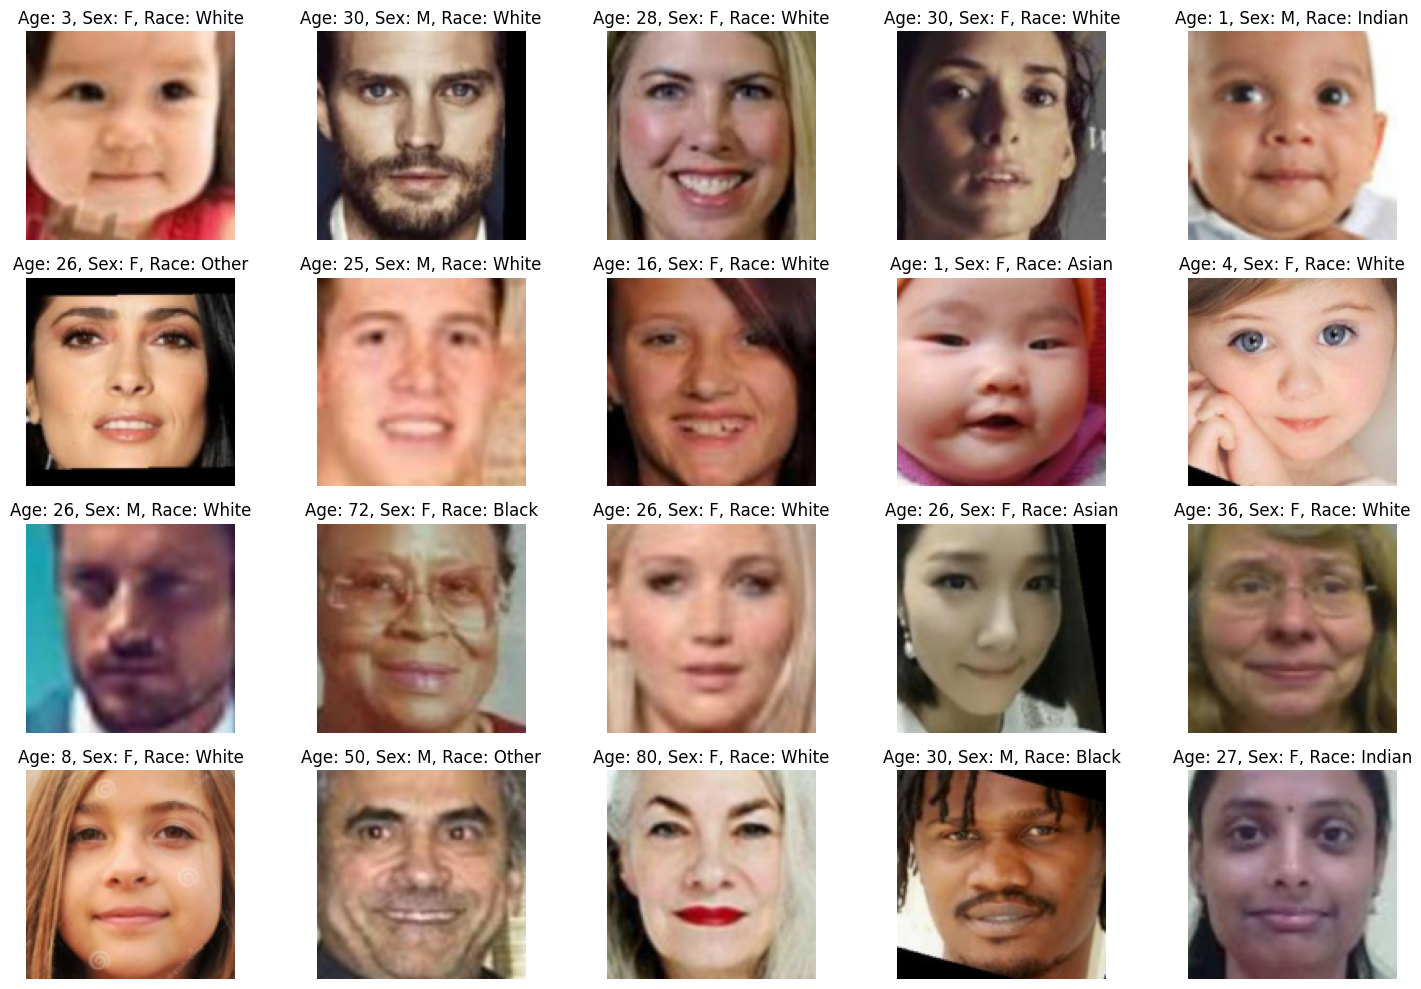

In [6]:
def show_20_from_dataset():
    gender_map = {0: "M", 1: "F"}
    race_map = {0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Other"}

    rows, cols = 4, 5
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(20):
        img, label = ds[i]  # Get image and label from dataset
        img = img.permute(1, 2, 0).numpy()  # CHW → HWC for matplotlib

        age = label['age']
        gender = gender_map[label['gender']]
        race = race_map[label['race']]

        axes[i].imshow(img)
        axes[i].set_title(f"Age: {age}, Sex: {gender}, Race: {race}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
show_20_from_dataset()